In [1]:
import pandas as pd
import numpy as np
from pysal.lib import weights
from spreg import ML_Lag

df = pd.read_csv(r"D:\POI data\810_acc\reclass3_add_distanceTounderground.csv")

# 确保所有的值都是正的
assert all(df['Price_per_square_meter'] > 0), "Some values are non-positive!"

# 对Price_per_square_meter进行对数变换
df['Price_per_square_meter'] = np.log(df['Price_per_square_meter'])


df_encoded = pd.get_dummies(df, columns=['property_type','tenure'], drop_first=True)
coords = df_encoded[['lon', 'lat']].values

w = weights.KNN.from_array(coords, k=5)
w.transform = 'r'  # row-standardization

def replace_variable_names(summary, column_names):
    for i, col in enumerate(column_names):
        summary = summary.replace(f"var_{i}", col)
    return summary

# Add constant to the predictors
X = df_encoded.drop(['price', 'address', 
        'Price_per_square_meter', 'id', 'lat', 'lon','borough','distance_to_center'], axis=1)
X = (X - X.mean()) / X.std()  # It's a good practice to standardize your variables

# Save the columns
X_cols = ["Constant"] + list(X.columns) # X.columns=43个


# Create a numpy array from the dataframe
X = pd.DataFrame(np.hstack([np.ones((X.shape[0], 1)), X])).values

y = df_encoded['Price_per_square_meter']
y = (y - y.mean()) / y.std()  # Standardize the target variable as well

# Fit a spatial lag model
ml_lag = ML_Lag(y.values[:, None], X, w)

# After the model is fitted, replace the variable names in the summary
summary = ml_lag.summary
print(ml_lag.summary)


c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
c:\Users\84398\AppData\Local\Programs\Python\Python39\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
c:\Users\84398\AppD

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        3737
Mean dependent var  :      0.0000                Number of Variables   :          53
S.D. dependent var  :      1.0000                Degrees of Freedom    :        3684
Pseudo R-squared    :      0.6551
Spatial Pseudo R-squared:  0.5172
Sigma-square ML     :       0.347                Log likelihood        :   -3463.060
S.E of regression   :       0.589                Akaike info criterion :    7032.119
                                                 Schwarz criterion     :    7362.099

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

In [2]:
import matplotlib.pyplot as plt
# 定义数据
data = """
   CONSTANT      -0.0005516       0.0096320      -0.0572663       0.9543331
               var_1      -0.0595600       0.0186669      -3.1906809       0.0014194
               var_2       0.1987164       0.0159223      12.4803820       0.0000000
               var_3      -0.1422025       0.0160338      -8.8689089       0.0000000
               var_4       0.0365132       0.0127066       2.8735712       0.0040586
               var_5       0.0660475       0.0183897       3.5915440       0.0003287
               var_6       0.0063593       0.0099269       0.6406099       0.5217762
               var_7       0.0560245       0.0714774       0.7838079       0.4331528
               var_8       0.1425297       0.0301521       4.7270296       0.0000023
               var_9      -0.0000432       0.0681672      -0.0006341       0.9994941
              var_10       0.0370543       0.0452269       0.8192974       0.4126168
              var_11       0.0025846       0.0222316       0.1162558       0.9074498
              var_12      -0.0728281       0.0376087      -1.9364671       0.0528105
              var_13      -0.0113742       0.0109760      -1.0362795       0.3000717
              var_14      -0.0528578       0.0323558      -1.6336405       0.1023344
              var_15       0.0566996       0.0271424       2.0889657       0.0367108
              var_16      -0.1731032       0.0368508      -4.6974023       0.0000026
              var_17      -0.1378329       0.0255877      -5.3866765       0.0000001
              var_18       0.0148606       0.0149972       0.9908961       0.3217363
              var_19      -0.0606662       0.0687754      -0.8820917       0.3777272
              var_20       0.0007436       0.0143070       0.0519727       0.9585505
              var_21       0.1339811       0.0245319       5.4614931       0.0000000
              var_22       0.2021680       0.0387943       5.2112874       0.0000002
              var_23      -0.0803056       0.0303237      -2.6482796       0.0080903
              var_24      -0.0811280       0.0114452      -7.0883605       0.0000000
"""

# 初始化空列表
variable_list =  X_cols[0:25]
coefficient_list = []
std_error_list = []
z_statistic_list = []
probability_list = []

# 解析数据并填充列表
for line in data.strip().split("\n"):
    parts = line.split()
    coefficient_list.append(float(parts[1]))
    std_error_list.append(float(parts[2]))
    z_statistic_list.append(float(parts[3]))
    probability_list.append(float(parts[4]))

data = {
    'Variable': variable_list,
    'Coefficient': coefficient_list,
    'Std.Error': std_error_list,
    'z-Statistic': z_statistic_list,
    'Probability': probability_list
}

summary_df = pd.DataFrame(data)



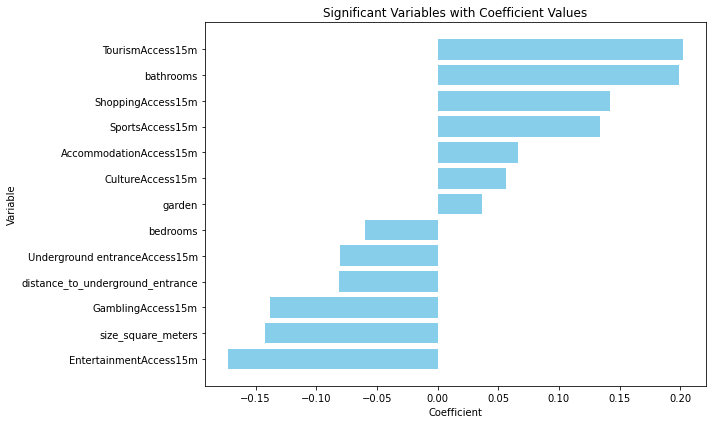

In [3]:
import matplotlib.pyplot as plt

# 筛选出Probability小于0.05的行
significant_vars = summary_df[summary_df['Probability'] < 0.05]

# 按Coefficient大小排序
significant_vars = significant_vars.sort_values(by='Coefficient', ascending=True)

# 绘制横向柱状图
plt.figure(figsize=(10, 6))
plt.barh(significant_vars['Variable'], significant_vars['Coefficient'], color='skyblue')
plt.ylabel('Variable')
plt.xlabel('Coefficient')
plt.title('Significant Variables with Coefficient Values')
plt.tight_layout()
plt.show()


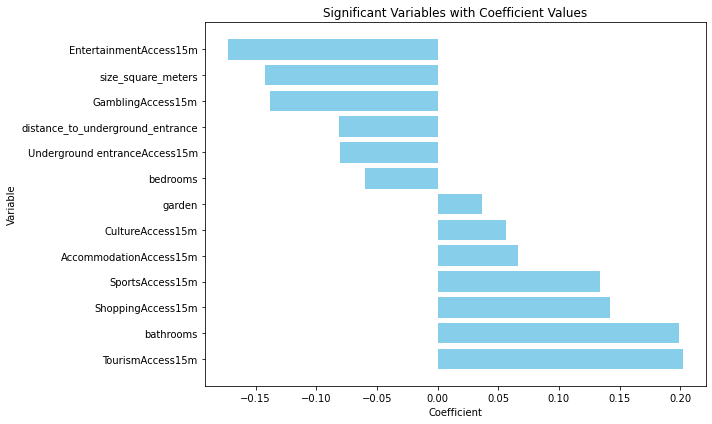

In [4]:
import matplotlib.pyplot as plt

# 筛选出Probability小于0.05的行
significant_vars = summary_df[summary_df['Probability'] < 0.05]

# 按Coefficient大小排序
significant_vars = significant_vars.sort_values(by='Coefficient', ascending=False)

# 绘制横向柱状图
plt.figure(figsize=(10, 6))
plt.barh(significant_vars['Variable'], significant_vars['Coefficient'], color='skyblue')
plt.ylabel('Variable')
plt.xlabel('Coefficient')
plt.title('Significant Variables with Coefficient Values')
plt.tight_layout()
plt.show()


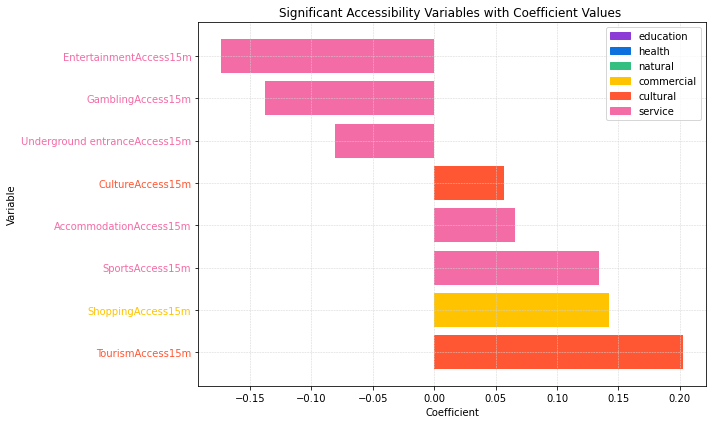

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def get_feature_type(feature):
    # 定义特征类别
    education_features = ['EducationAccess15m']
    health_features = ['HealthAccess15m']
    natural_features = ['Green parkAccess15m', 'Bodies of waterAccess15m']
    commercial_features = ['Manufacturing and productionAccess15m', 'ShoppingAccess15m']
    cultural_features = ['CultureAccess15m', 'TourismAccess15m']

    # 判断特征所属类别
    if feature in education_features:
        return 'education'
    elif feature in health_features:
        return 'health'
    elif feature in natural_features:
        return 'natural'
    elif feature in commercial_features:
        return 'commercial'
    elif feature in cultural_features:
        return 'cultural'
    else:
        return 'service'

type_colors = {
    'education': '#8D3BD6',   
    'health': '#0D71DD',          
    'natural': '#33BF80',         
    'commercial': '#FFC300',   
    'cultural': '#FF5733',       
    'service': '#F36CA6'           
}

# 筛选出Probability小于0.05的行，并且特征名以"15m"结尾
significant_vars = summary_df[(summary_df['Probability'] < 0.05) & (summary_df['Variable'].str.endswith('15m'))]

# 按Coefficient大小排序
significant_vars = significant_vars.sort_values(by='Coefficient', ascending=False)

# 获取每个特征的颜色
colors = [type_colors[get_feature_type(feature)] for feature in significant_vars['Variable']]

# 绘制横向柱状图
plt.figure(figsize=(10, 6))
ax = plt.gca()  # 获取当前的axes对象
bars = ax.barh(significant_vars['Variable'], significant_vars['Coefficient'], color=colors)
plt.ylabel('Variable')
plt.xlabel('Coefficient')
plt.title('Significant Accessibility Variables with Coefficient Values ')



# 添加浅灰色的格纹横线和竖线
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)



# 设置y轴刻度文本颜色为柱子的颜色
for tick_label, color in zip(ax.get_yticklabels(), colors):
    tick_label.set_color(color)

# 创建图例的标签
legend_handles = [mpatches.Patch(color=color, label=feature_type) for feature_type, color in type_colors.items()]

# 在图的右上角添加图例
ax.legend(handles=legend_handles, loc='upper right')


plt.tight_layout()
plt.show()